In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6,4)

# Dataset 1: Iris

In [3]:
#reading the dataset
df = pd.read_csv("Iris.csv")

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop('Id', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 1. List down the features and their types (e.g., numeric, nominal) 

In [10]:
for col in df.columns:
    if df[col].dtype != 'O':
        print(f"Data type of {col} is Numeric [{df[col].dtype}]")
    else:
        print(f"Data type of {col} is Nominal [{df[col].dtype}]")

Data type of SepalLengthCm is Numeric [float64]
Data type of SepalWidthCm is Numeric [float64]
Data type of PetalLengthCm is Numeric [float64]
Data type of PetalWidthCm is Numeric [float64]
Data type of Species is Nominal [object]


In [11]:
X = df.drop('Species', axis=1)

### 2. Create a histogram for each feature in the dataset to illustrate the feature distributions.

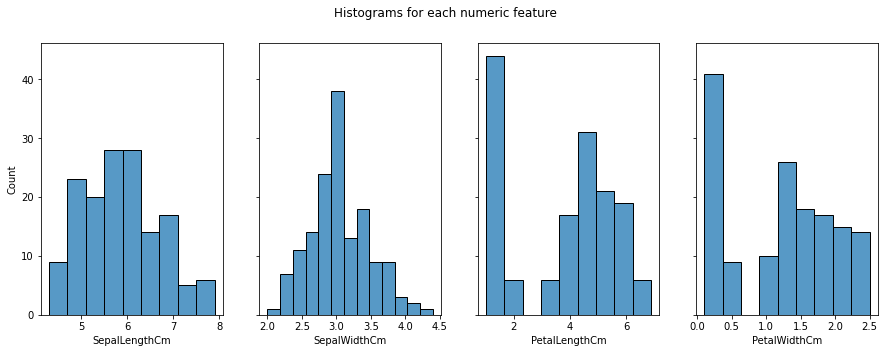

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Histograms for each numeric feature')

for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i])

plt.show();

### 3. Create a box plot for each feature in the dataset.


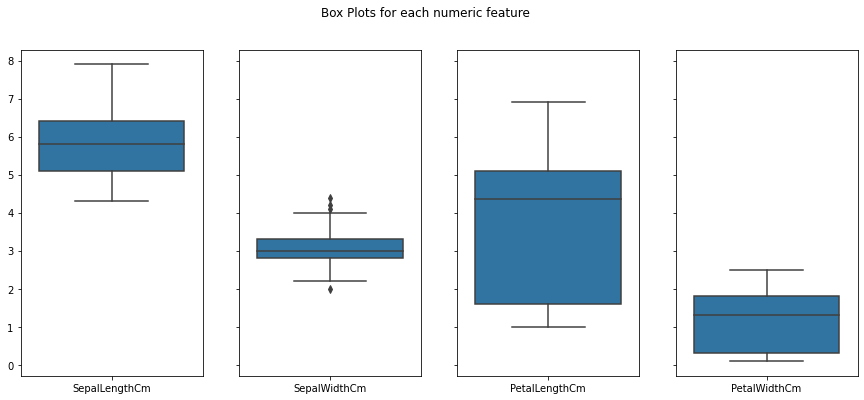

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6), sharey=True)

fig.suptitle('Box Plots for each numeric feature')

for i, col in enumerate(X.columns):
    sns.boxplot(data=X[col], ax=axes[i], orient="v")
    axes[i].set_xticklabels([col])
    
plt.show();

### 4. Compare distributions and identify outliers

In [14]:
Q1 = np.percentile(df['SepalWidthCm'], 25)
Q3 = np.percentile(df['SepalWidthCm'], 75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [15]:
cdf = df.loc[(~np.array(df['SepalWidthCm']>=upper)) & (~np.array(df['SepalWidthCm']<=lower))]
outliers = df.loc[~((~np.array(df['SepalWidthCm']>=upper)) & (~np.array(df['SepalWidthCm']<=lower)))]
outliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


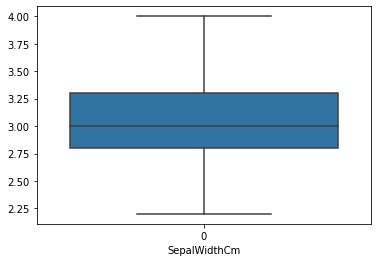

In [16]:
sns.boxplot(data=cdf['SepalWidthCm']);
plt.xlabel('SepalWidthCm');
plt.show();

# Dataset 2: Starbucks

In [69]:
dataset = pd.read_csv("starbucks-menu-nutrition-drinks.csv")

In [70]:
dataset

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
...,...,...,...,...,...,...,...
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
Unnamed: 0    177 non-null object
Calories      177 non-null object
Fat (g)       177 non-null object
Carb. (g)     177 non-null object
Fiber (g)     177 non-null object
Protein       177 non-null object
Sodium        177 non-null object
dtypes: object(7)
memory usage: 9.8+ KB


In [72]:
dataset.isnull().sum()

Unnamed: 0    0
Calories      0
Fat (g)       0
Carb. (g)     0
Fiber (g)     0
Protein       0
Sodium        0
dtype: int64

In [73]:
dataset.dtypes

Unnamed: 0    object
Calories      object
Fat (g)       object
Carb. (g)     object
Fiber (g)     object
Protein       object
Sodium        object
dtype: object

In [83]:
for col in dataset.columns:
    if dataset[col].dtype != 'O':
        print(f"Data type of {col} is Numeric [{dataset[col].dtype}]")
    else:
        print(f"Data type of {col} is Nominal [{dataset[col].dtype}]")

Data type of Unnamed: 0 is Nominal [object]
Data type of Calories is Nominal [object]
Data type of Fat (g) is Nominal [object]
Data type of Carb. (g) is Nominal [object]
Data type of Fiber (g) is Nominal [object]
Data type of Protein is Nominal [object]
Data type of Sodium is Nominal [object]


In [89]:
dataset['Calories']=pd.to_numeric(dataset['Calories'], errors='coerce')
dataset['Sodium']=pd.to_numeric(dataset['Sodium'], errors='coerce')
dataset['Protein']=pd.to_numeric(dataset['Protein'], errors='coerce')
dataset['Fat (g)']=pd.to_numeric(dataset['Fat (g)'], errors='coerce')
dataset['Carb. (g)']=pd.to_numeric(dataset['Carb. (g)'], errors='coerce')
dataset['Fiber (g)']=pd.to_numeric(dataset['Fiber (g)'], errors='coerce')

In [90]:
dataset.dtypes

Unnamed: 0     object
Calories      float64
Fat (g)       float64
Carb. (g)     float64
Fiber (g)     float64
Protein       float64
Sodium        float64
dtype: object

<AxesSubplot:xlabel='Calories', ylabel='Count'>

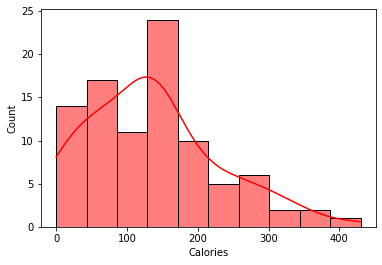

In [98]:
sns.histplot(data=dataset['Calories'], bins=10, color='red', kde=True )

<AxesSubplot:xlabel='Sodium', ylabel='Count'>

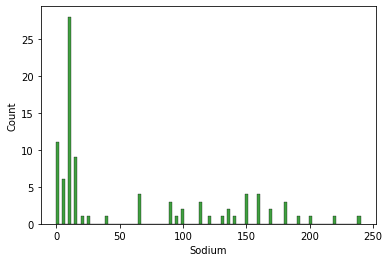

In [94]:
sns.histplot(data=dataset['Sodium'], bins=100, color='green' )

<AxesSubplot:xlabel='Protein', ylabel='Count'>

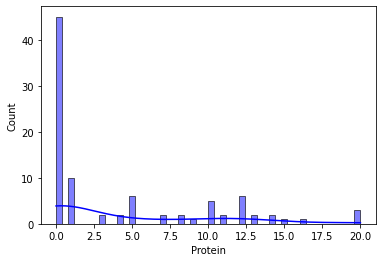

In [99]:
sns.histplot(data=dataset['Protein'], bins=50, color='blue', kde=True)

<AxesSubplot:xlabel='Sodium'>

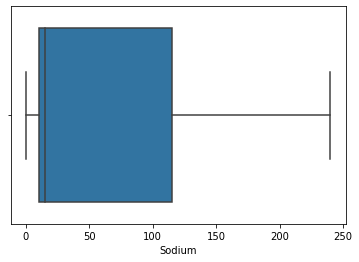

In [114]:
sns.boxplot(x='Sodium', data=dataset)

<AxesSubplot:xlabel='Calories'>

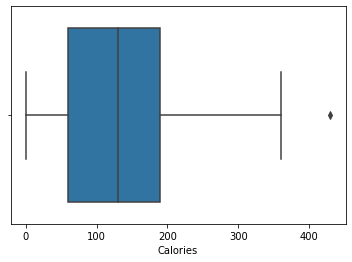

In [113]:
sns.boxplot(x='Calories', data=dataset)

<AxesSubplot:xlabel='Fiber (g)'>

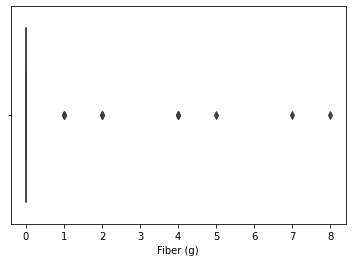

In [112]:
sns.boxplot(x='Fiber (g)',data=dataset)

<AxesSubplot:xlabel='Protein'>

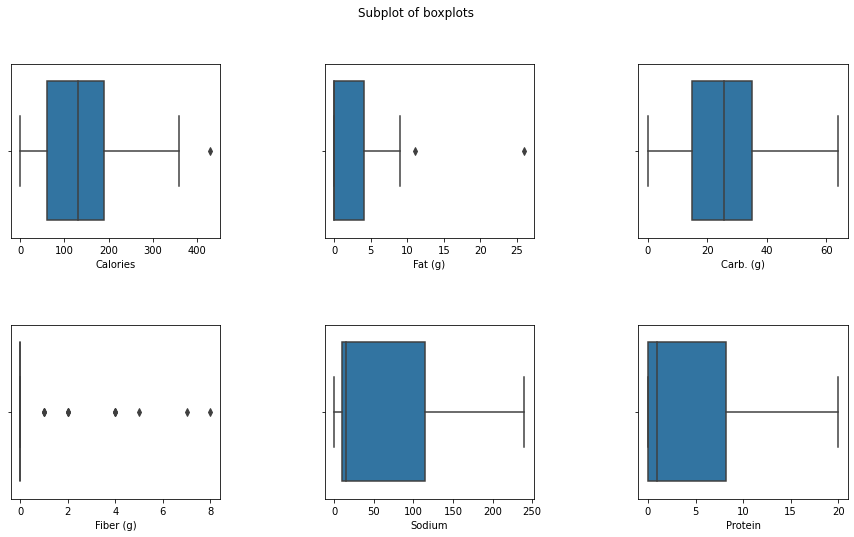

In [120]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Subplot of boxplots")
sns.boxplot(data=dataset, x='Calories', ax=axes[0,0])
sns.boxplot(data=dataset, x='Fat (g)', ax=axes[0,1])
sns.boxplot(data=dataset, x='Carb. (g)', ax=axes[0,2])
sns.boxplot(data=dataset, x='Fiber (g)', ax=axes[1,0])
sns.boxplot(data=dataset, x='Sodium', ax=axes[1,1])
sns.boxplot(data=dataset, x='Protein', ax=axes[1,2])

<AxesSubplot:xlabel='Protein', ylabel='Count'>

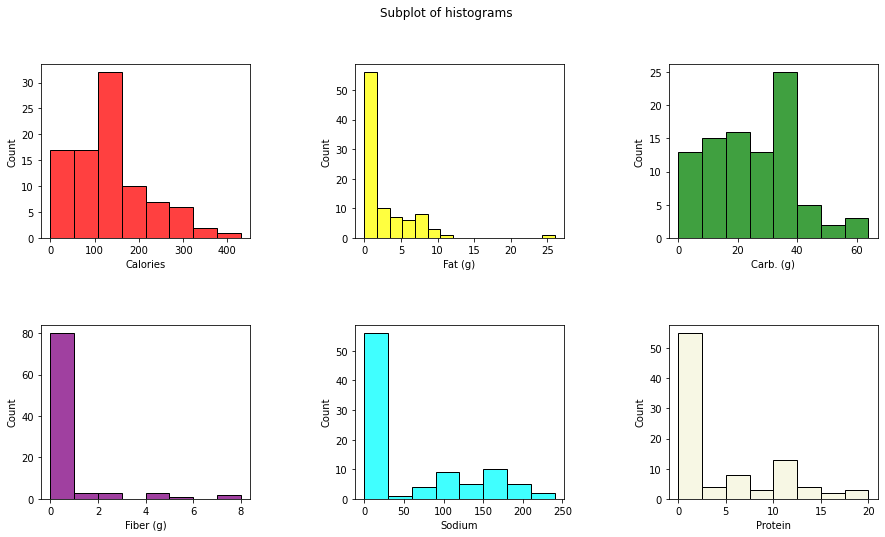

In [129]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Subplot of histograms")
sns.histplot(data=dataset, x='Calories', ax=axes[0,0], color='red')
sns.histplot(data=dataset, x='Fat (g)', ax=axes[0,1], color='yellow')
sns.histplot(data=dataset, x='Carb. (g)', ax=axes[0,2], color='green')
sns.histplot(data=dataset, x='Fiber (g)', ax=axes[1,0], color='purple')
sns.histplot(data=dataset, x='Sodium', ax=axes[1,1], color='cyan')
sns.histplot(data=dataset, x='Protein', ax=axes[1,2], color='beige')

In [132]:
Q1 = np.percentile(dataset['Calories'], 25)
Q3 = np.percentile(dataset['Calories'], 75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [136]:
outliers = dataset.loc[~((~np.array(dataset['Calories']>=upper)) & (~np.array(dataset['Calories']<=lower)))]
outliers

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium


In [141]:
Q1 = np.percentile(dataset['Fiber (g)'], 25)
Q3 = np.percentile(dataset['Fiber (g)'], 75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [142]:
outliers = dataset.loc[~((~np.array(dataset['Fiber (g)']>=upper)) & (~np.array(dataset['Fiber (g)']<=lower)))]
outliers

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium


# Dataset 3: Covid 

In [157]:
d = pd.read_csv("covid_worldwide.csv")

In [158]:
d

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [159]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
Serial Number      231 non-null int64
Country            231 non-null object
Total Cases        231 non-null object
Total Deaths       225 non-null object
Total Recovered    210 non-null object
Active Cases       212 non-null object
Total Test         213 non-null object
Population         228 non-null object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [160]:
d.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [161]:
d.dropna()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
217,218,Anguilla,"3,904",12,"3,879",13,"51,382","15,230"
218,219,Macao,"3,488",120,"3,357",11,"7,850","667,490"
219,220,Saint Pierre Miquelon,"3,452",2,"2,449","1,001","25,400","5,759"
220,221,Wallis and Futuna,"3,427",7,438,"2,982","20,508","10,982"


In [162]:
d.dtypes

Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

In [163]:
for col in d.columns:
    if d[col].dtype != 'O':
        print(f"Data type of {col} is Numeric [{d[col].dtype}]")
    else:
        print(f"Data type of {col} is Nominal [{d[col].dtype}]")

Data type of Serial Number is Numeric [int64]
Data type of Country is Nominal [object]
Data type of Total Cases is Nominal [object]
Data type of Total Deaths is Nominal [object]
Data type of Total Recovered is Nominal [object]
Data type of Active Cases is Nominal [object]
Data type of Total Test is Nominal [object]
Data type of Population is Nominal [object]


In [164]:
d['Total Cases']=pd.to_numeric(d['Total Cases'], errors='coerce')
d['Total Deaths']=pd.to_numeric(d['Total Deaths'], errors='coerce')
d['Total Recovered']=pd.to_numeric(d['Total Recovered'], errors='coerce')
d['Active Cases']=pd.to_numeric(d['Active Cases'], errors='coerce')
d['Total Test']=pd.to_numeric(d['Total Test'], errors='coerce')
d['Population']=pd.to_numeric(d['Population'], errors='coerce')

In [165]:
d

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,NaN,NaN,NaN,NaN,NaN,NaN
1,2,India,NaN,NaN,NaN,NaN,NaN,NaN
2,3,France,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Germany,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Brazil,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
227,228,Vatican City,29.0,NaN,29.0,0.0,NaN,799.0
228,229,Western Sahara,10.0,1.0,9.0,0.0,NaN,NaN
229,230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


<AxesSubplot:xlabel='Total Cases', ylabel='Count'>

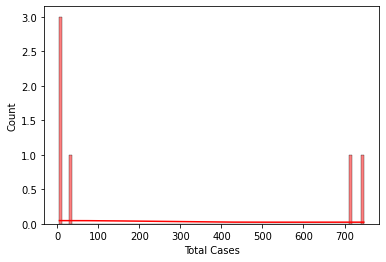

In [167]:
sns.histplot(data=d['Total Cases'], bins=100, color='red', kde=True )

<AxesSubplot:xlabel='Total Deaths', ylabel='Count'>

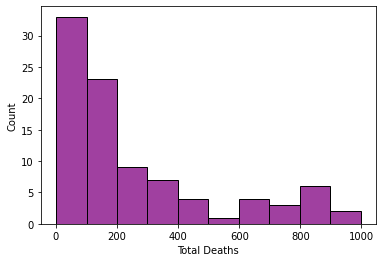

In [168]:
sns.histplot(data=d['Total Deaths'], bins=10, color='purple' )

<AxesSubplot:xlabel='Total Recovered', ylabel='Count'>

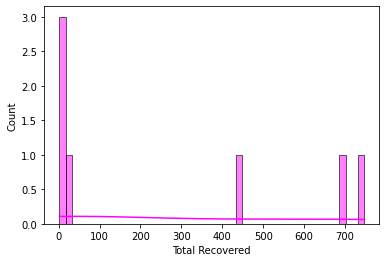

In [169]:
sns.histplot(data=d['Total Recovered'], bins=50, color='magenta', kde=True )

<AxesSubplot:xlabel='Population'>

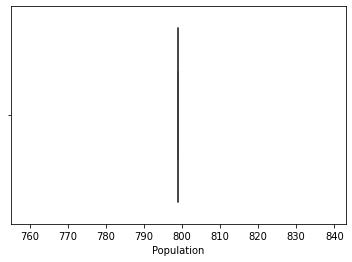

In [170]:
sns.boxplot(x='Population', data=d)

<AxesSubplot:xlabel='Active Cases'>

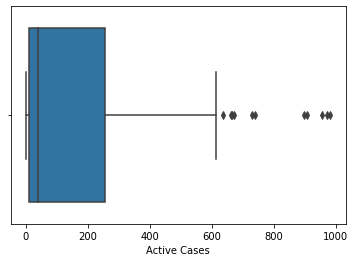

In [171]:
sns.boxplot(x='Active Cases', data=d)

<AxesSubplot:xlabel='Total Cases'>

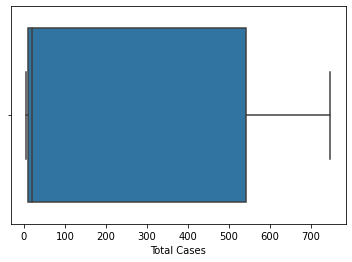

In [173]:
sns.boxplot(x='Total Cases', data=d)

<AxesSubplot:xlabel='Population'>

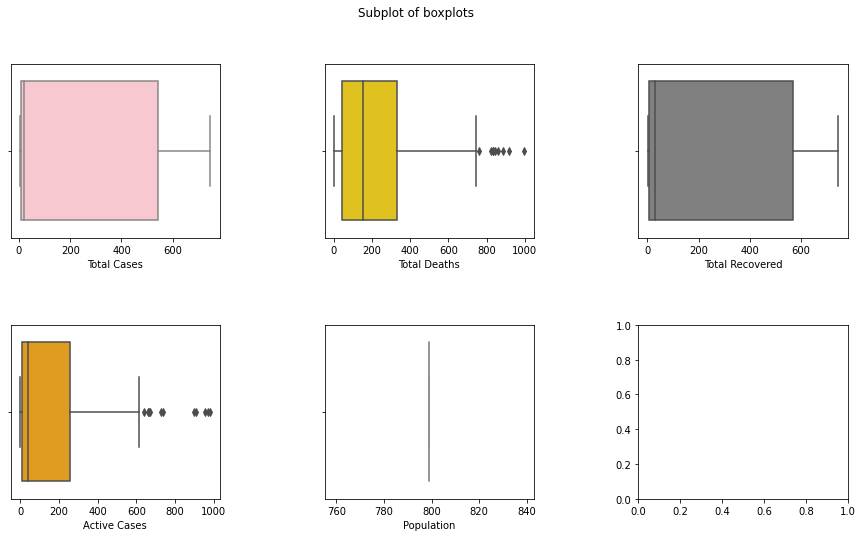

In [192]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Subplot of boxplots")
sns.boxplot(data=d, x='Total Cases', ax=axes[0,0], color='pink')
sns.boxplot(data=d, x='Total Deaths', ax=axes[0,1], color='gold')
sns.boxplot(data=d, x='Total Recovered', ax=axes[0,2], color='grey')
sns.boxplot(data=d, x='Active Cases', ax=axes[1,0], color='orange')
sns.boxplot(data=d, x='Population', ax=axes[1,1], color='lavender')

<AxesSubplot:xlabel='Population', ylabel='Count'>

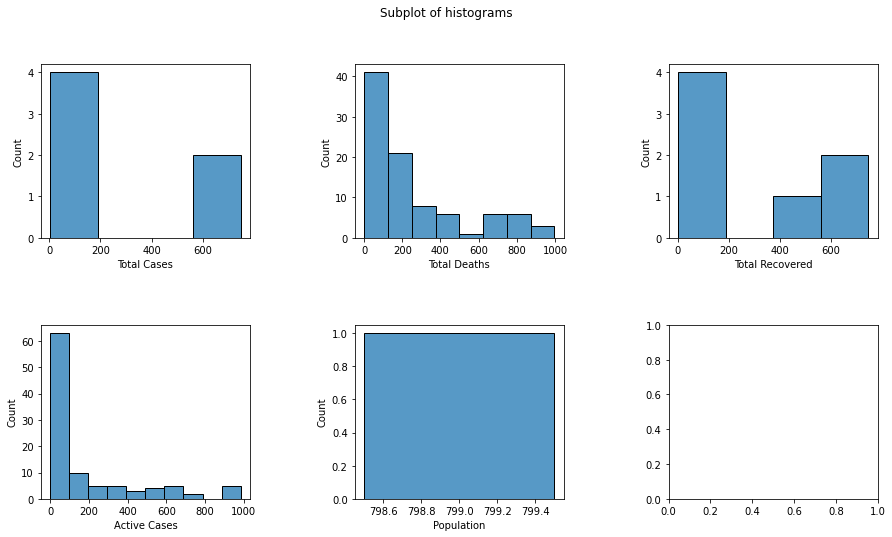

In [191]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Subplot of histograms")
sns.histplot(data=d, x='Total Cases', ax=axes[0,0])
sns.histplot(data=d, x='Total Deaths', ax=axes[0,1])
sns.histplot(data=d, x='Total Recovered', ax=axes[0,2])
sns.histplot(data=d, x='Active Cases', ax=axes[1,0])
sns.histplot(data=d, x='Population', ax=axes[1,1])

In [182]:
Q1 = np.percentile(d['Active Cases'], 25)
Q3 = np.percentile(d['Active Cases'], 75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [184]:
outliers = d.loc[~((~np.array(d['Active Cases']>=upper)) & (~np.array(d['Active Cases']<=lower)))]
outliers

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population


In [185]:
Q1 = np.percentile(d['Total Deaths'], 25)
Q3 = np.percentile(d['Total Deaths'], 75)
IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [186]:
outliers = d.loc[~((~np.array(d['Total Deaths']>=upper)) & (~np.array(d['Total Deaths']<=lower)))]
outliers

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
